In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

#price is in lakhs indian rupees

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [155]:
df1.shape

(13320, 9)

In [156]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [157]:
df2=df1.drop(['area_type','availability','society','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [158]:
df2.isnull().sum()

#since number of null values are very small as comparision with number of records in our dataset
#so we can drop our null values easily

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [159]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [160]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [161]:
#creating a new column named bhk

df3['bhk']=df3['size'].apply(lambda x:int(x.split()[0]))

C:\Users\MXS210~1\AppData\Local\Temp/ipykernel_19152/2344629671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split()[0]))


In [162]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [163]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [164]:
df3[(df3['bhk']==43) | (df3['bhk']==27) ]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [165]:
#before dropping these outliers, let's explore total_sqft feature

df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [166]:
#there are values with range in it

In [167]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [168]:
#it will return us the non float values

df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [169]:
def convert_sqft_to_num(x):
    y=x.split('-')
    
    if len(y)==2:                                    #range values to their mean
        return (float(y[0])+float(y[1]))/2
    try:                                             #float of value
        return float(x)
    except:                                          #if cant convert to float then dont return anything
        return None

In [170]:
#if something is not in format xxx-xxx or simply xxx, then it will not return anything

In [171]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [172]:
#priviously total_Sqft of 30th row was in range format
#now it is in float
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [173]:
#creating new feature named price_per_sqft
#price_per_sqft is in indian rupees

df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [174]:
df5['location'].nunique()

1304

In [175]:
#.strip will take care of spaces in the beginning and end

df5['location']=df5['location'].apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [176]:
len(location_stats[location_stats<=10])

1052

In [177]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [178]:
len(df5['location'].unique())

1293

In [179]:
#naming locations with less than 10 counts to other

df5['location']=df5['location'].apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

242

In [180]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [181]:
#removing outliers
#if house has per room area less than 300, then it might be a outliers

df5[df5['total_sqft']/df5['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [182]:
df5.shape

(13246, 7)

In [183]:
# ~ it neglects the output of code

df6=df5[~(df5['total_sqft']/df5['bhk']<300)]
df6.shape

(12502, 7)

In [184]:
#other type of outlier is price_per_sqft
#we are making a general model for house price prediction, i.e can remove min max price_per_sqft
#around 68% data resides around mean of normal distribution

In [185]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [186]:
#we need to look for outliers per location because
#each location will have different price ranges
#hence we need to check for each location

In [187]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):          #key is particuar location name and subdf is complete dataset for that particular location
        m=np.mean(subdf['price_per_sqft'])            #selecting particular column from subdf and taking its mean
        st=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out

In [188]:
df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [189]:
#visualization for some other outliers

In [190]:
def plot_scatter_chart(df,place):
    bhk2=df[(df['location']==place) & (df['bhk']==2)]
    bhk3=df[(df['location']==place) & (df['bhk']==3)]
    plt.figure(figsize=(10,5))
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='red',label='2BHK')
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='blue',label='3BHK')
    plt.xlabel('TOTAL SQFT AREA')
    plt.ylabel('PRICE')
    plt.legend()

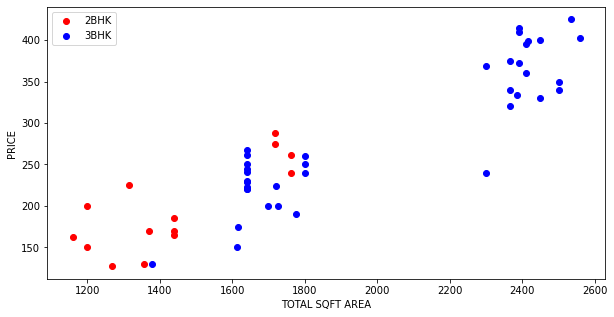

In [191]:
#there are some 2bhk flats costlier than 3bhk flats in same location

plot_scatter_chart(df7,'Rajaji Nagar')

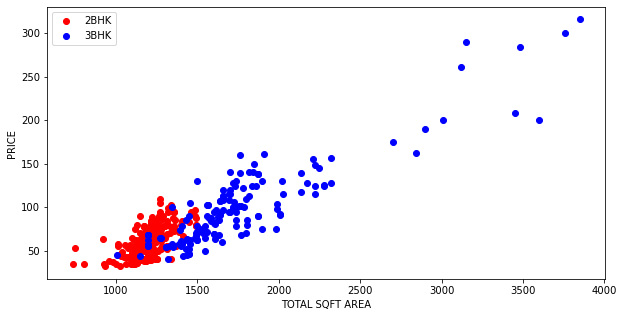

In [192]:
#same for other locations also

plot_scatter_chart(df7,'Whitefield')

In [193]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={                                          #for every bhk , cal mean ,std and no. of obervations and storing thrm in a dictionary
                'mean':np.mean(bhk_df['price_per_sqft']),
                'std':np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):                  #comparing price_per_sqft value of higher bhk with mean of small bhk, is lesser then drop the record
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)
    

In [194]:
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

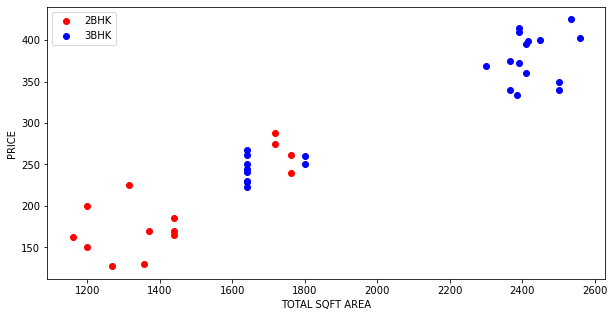

In [195]:
#now we can see that majority of those observations are removed now

plot_scatter_chart(df8,'Rajaji Nagar')

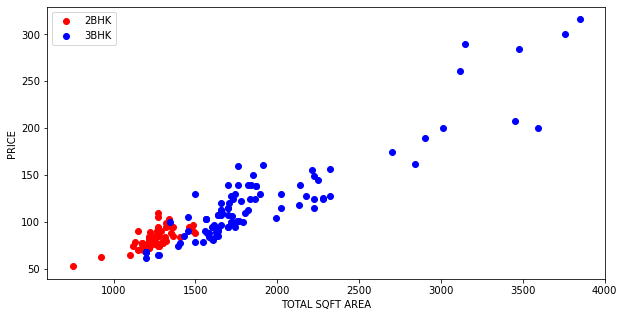

In [196]:
plot_scatter_chart(df8,'Whitefield')

Text(0.5, 1.0, 'Number of houses vs price per sqft')

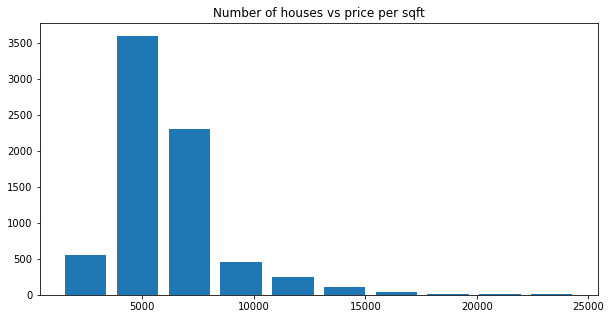

In [197]:
plt.figure(figsize=(10,5))
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.title("Number of houses vs price per sqft")

In [198]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [199]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [200]:
#dropping the flats with number of bathrooms - number of rooms >2

Text(0.5, 1.0, 'number of homes vs number of bathrooms')

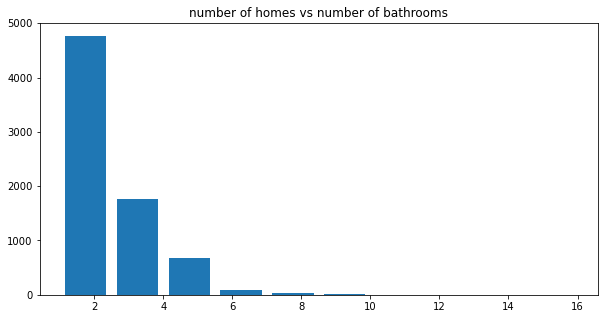

In [201]:
plt.figure(figsize=(10,5))
plt.hist(df8['bath'],rwidth=0.8)
plt.title('number of homes vs number of bathrooms')

In [202]:
df8[(df8['bath']>df8['bhk']+2)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [203]:
df9=df8[(df8['bath']<df8['bhk']+2)]
df9.shape

(7251, 7)

In [204]:
#dropping size and price_per_sqft (cretaed this only for outlier detection)

df10=df9.drop(['size','price_per_sqft'],axis=1)
df10.shape

(7251, 5)

ML Algorithm

In [205]:
#location column is in text format, for ML model to understand it, we need to conver it to numeric
#can do it by one hot encoding Or dummy


In [206]:
dummies=pd.get_dummies(df10['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
#concat dummies with our dataset and dropping one dummy column (last column) because (dummies-1) is enough for analysis

df11=pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
#since dummies have all locations, we can drop locations

df12=df11.drop('location',axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
#droping dependent variable from x
#X is independent variables, y is dependent variable

X=df12.drop('price',axis=1)
y=df12['price']

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
lr_clf=LinearRegression()

In [214]:
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874312

In [215]:
#using kfold cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [216]:
#shufflesplit will split the dataset so that ina particular fold shuffled data will come, no same locations altogether

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

#we are almost similar score for each fold

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

In [217]:
#trying different regreesion algorithms using gridsearchCV
#gridsearchCV will run our model on different regressions with different parameters and provide us the best model

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
#checking scores between linear regression, lasso, decisionregression
#best scores of these 3 models on their own with different combinations of parameters

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [220]:
find_best_model_using_gridsearchcv(X,y)

#hence best model is linearregression with parameter normalize=True

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,{'alpha': 1}
2,decision_tree,0.729874,{'splitter': 'best'}


In [221]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]    #it will find column index of that particular location

    x = np.zeros(len(X.columns))                     #creating a array of xeroes with same length as no of columns in our dataset
    x[0] = sqft                                     #first 3column same sequence as in our dataset first entry to be entered as sqft
    x[1] = bath                                      #second entry to be entered as bath and third as bhk
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1                              #location entered by us in predict_price, it will put 1 in that location's dummy variable's column position

    return lr_clf.predict([x])[0]

In [222]:
predict_price('1st Phase JP Nagar',1000,2,2)

#output is in lakhs

83.49904677179237

In [223]:
predict_price('1st Phase JP Nagar',1000,3,3)

86.80519395205847

In [224]:
predict_price('Indira Nagar',1000,2,2)

181.2781548400685

In [225]:
predict_price('Indira Nagar',1000,3,3)

184.58430202033463

In [226]:
import pickle

with open("banglore_home_prices_model.pickle",'wb') as f:
    pickle.dump(lr_clf,f)

In [227]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [228]:
#we will use this pickle file and json file in our python flask server